In [35]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate as integ
from tqdm import tqdm_notebook

# Set plot params
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize

In [72]:
def chi_xh(t, gamma, omega):
    return np.exp(-gamma*t/2) * np.sin(omega*t)/omega

def chi_test(length):
    return np.ones(length)

def x0_func(t, gamma, omega):
    return np.exp(-gamma*t/2) * np.cos(omega * t)

def integral(ts, deltat, gamma, omega):
    val = np.zeros((len(ts)))
    for i, t in enumerate(ts):
        tprim = t - ts[:i+1]
#         integ1 = chi_xh(tprim, gamma, omega)
        integ1 = chi_test(i+1)
        integ2 = np.random.normal(0,1/deltat, i+1)
        integrand = deltat*(integ1*integ2)
        val[i] = np.sum( integrand )
    return val

In [73]:
N = 100  # nbr of oscilaltors
gamma = 0.02
omega = np.sqrt(1-gamma**2/4)  # omega is real
gs = [0.1, 10]
ts = np.linspace(0,1000, 2000)
deltat = ts[1]-ts[0]
x_xi = np.zeros((len(gs), N, len(ts)))
x0 = np.zeros(len(ts))
print(rf'$\Delta t / \gamma$={deltat/gamma:.2f}')
print(rf'$\Delta t$={deltat}')
print(rf'$\gamma^-1 $={1/gamma}')
# Initial condition
x_xi[:,0] = 1.0  # release all oscillators from x=1 at t=0
x0 = x0_func(ts, gamma, omega)

for i, g in tqdm_notebook(enumerate(gs)):
    for n in tqdm_notebook(range(N)):   
        x_xi[i,n, :] = x0 + np.sqrt(g)*integral(ts,deltat,gamma, omega)

$\Delta t / \gamma$=25.01
$\Delta t$=0.5002501250625313
$\gamma^-1 $=50.0


Text(0.5, 0, '$t$')

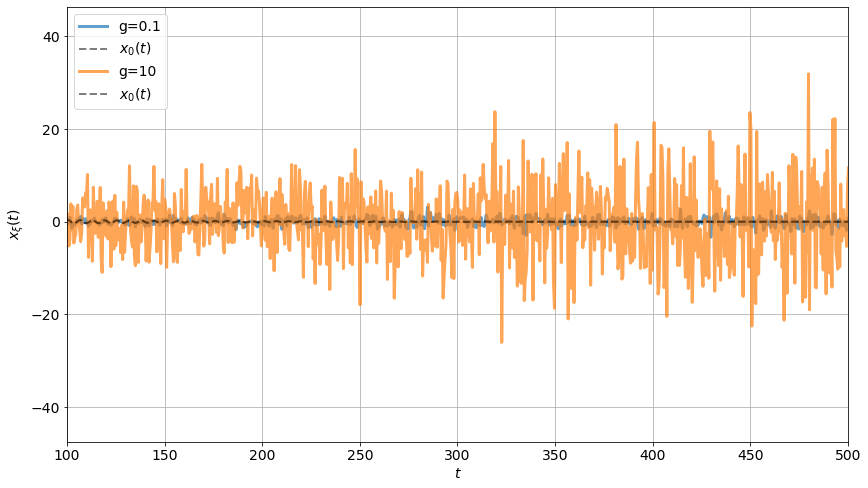

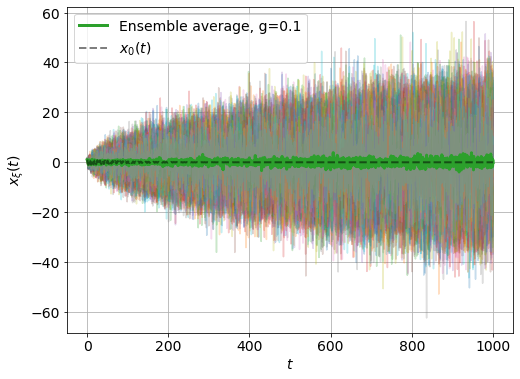

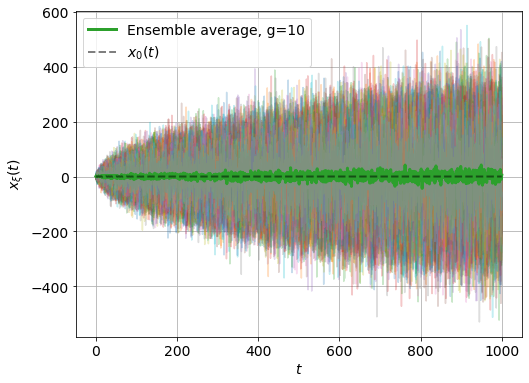

In [74]:
fig_avg, ax_avg = plt.subplots(figsize=(14,8)) # Plot all averages here
for i, g in enumerate(gs):
    fig, ax = plt.subplots(figsize=(8,6))  # Plot all individual plots here
    for n in range(N):
        ax.plot(ts, x_xi[i, n, :], alpha=0.25)
    ax.plot(ts, x_xi[i,:,:].mean(axis=0), c='C2', linewidth=3, label=f'Ensemble average, g={g}')
    ax.plot(ts, x0, c='k', linewidth=2, alpha=0.5, linestyle='--', label=r'$x_0(t)$')
    
    # Plot these in ax_avg as well
    ax_avg.plot(ts, x_xi[i,:,:].mean(axis=0), alpha=0.7, linewidth=3, label=f'g={g}')
    ax_avg.plot(ts, x0, c='k', linewidth=2, alpha=0.5, linestyle='--', label=r'$x_0(t)$')
    
    ax.grid()
    ax.legend(loc='best')
    ax.set_ylabel(r'$x_\xi(t)$')
    ax.set_xlabel(r'$t$')

ax_avg.set_xlim(100,500)
ax_avg.grid()
ax_avg.legend(loc='best')
ax_avg.set_ylabel(r'$x_\xi(t)$')
ax_avg.set_xlabel(r'$t$')
    
# ax.set_xlim(900,1000)


The variance is the same as the square of the average (<s^2>) since the mean is 0: 

$$ Var(x) = <x^2> - <x>^2 = <x^2> \rightarrow x_{rms} = \sqrt{Var(x)} $$
The RMS length of a walk is $ l_{rms} = \sqrt{N}l$ and for us the step length is deltat and N is the number of steps. Thus, our walk should have variance that is 

$$ Var(x) = x_{rms} = N*l^2 = N_{t} \Delta T  *  \Delta T $$

Text(0, 0.5, 'Var($x_\\xi$)')

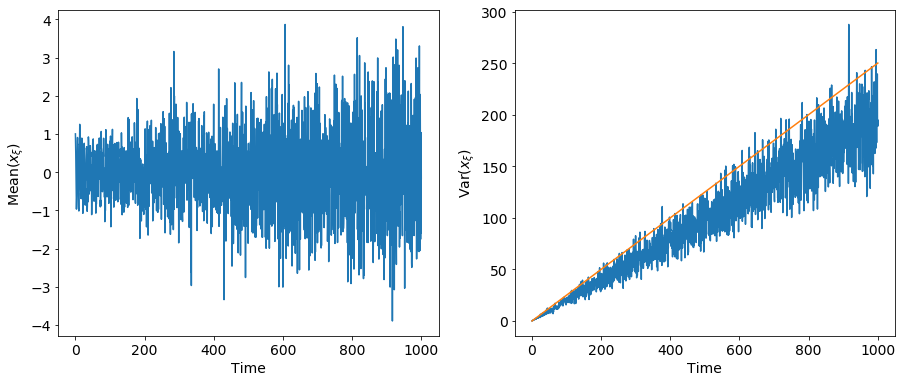

In [82]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(ts, np.mean(x_xi[0,:,:], axis=0))
ax[0].set_xlabel("Time")
ax[0].set_ylabel(r'Mean($x_\xi$)')

ax[1].plot(ts, np.var(x_xi[0,:,:], axis=0))
ax[1].plot(ts, ts*deltat**2)
ax[1].set_xlabel("Time")
ax[1].set_ylabel(r'Var($x_\xi$)')